In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

In [127]:
df =pd.read_csv('/content/HIV_dataset.csv')

In [128]:
df.head()

,Age,Marital Staus,STD,Educational Background,HIV TEST IN PAST YEAR,AIDS education,Places of seeking sex partners,SEXUAL ORIENTATION,Drug- taking,Result
0,22,UNMARRIED,NO,College Degree,YES,NO,Bar,Heterosexual,YES,POSITIVE
1,20,UNMARRIED,NO,College Degree,NO,YES,NaN,Heterosexual,NO,NEGATIVE
2,23,Married,YES,College Degree,NO,YES,NaN,Bisexual,NO,NEGATIVE
3,24,Married,NO,College Degree,YES,YES,Park,Heterosexual,YES,POSITIVE
4,18,UNMARRIED,YES,Senior High School,YES,NO,Internet,Heterosexual,YES,POSITIVE


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             698 non-null    int64 
 1   Marital Staus                   698 non-null    object
 2   STD                             698 non-null    object
 3   Educational Background          698 non-null    object
 4   HIV TEST IN PAST YEAR           698 non-null    object
 5   AIDS education                  698 non-null    object
 6   Places of seeking sex partners  676 non-null    object
 7   SEXUAL ORIENTATION              698 non-null    object
 8   Drug- taking                    698 non-null    object
 9   Result                          698 non-null    object
dtypes: int64(1), object(9)
memory usage: 54.7+ KB


In [130]:
df.describe(include=object)

,Marital Staus,STD,Educational Background,HIV TEST IN PAST YEAR,AIDS education,Places of seeking sex partners,SEXUAL ORIENTATION,Drug- taking,Result
count,698,698,698,698,698,676,698,698,698
unique,7,4,6,2,4,6,5,4,4
top,UNMARRIED,NO,College Degree,NO,NO,Internet,Heterosexual,NO,NEGATIVE
freq,276,367,212,428,409,200,370,396,349


In [131]:
df.shape

(698, 10)

In [132]:
for column in df.columns:
    print(f"Unique values in '{column}': {df[column].unique()}\n")

Unique values in 'Age': [22 20 23 24 18 15 70 44 13 19 25 75 50 76 34 45 56 27 29 40 78 16 26 37
 12 67 21 30 71 80 35 68 17 38 46 42 41 28 64 69 73 14 49 43 47 39 36 31
 32 79 57 51 48 33 59 62 54 52 61 58 53 60 65 66 55]

Unique values in 'Marital Staus': ['UNMARRIED' 'Married' 'MARRIED' 'Widowed' 'Divorced' 'Cohabiting'
 'DIvorced']

Unique values in 'STD': ['NO' 'YES' 'No' 'Yes']

Unique values in 'Educational Background': ['College Degree' 'Senior High School' 'Junior High School' 'Illiteracy'
 'Primary School' 'College Dregree']

Unique values in 'HIV TEST IN PAST YEAR': ['YES' 'NO']

Unique values in 'AIDS education': ['NO' 'YES' 'No' 'Yes']

Unique values in 'Places of seeking sex partners': ['Bar' nan 'Park' 'Internet' 'Public bath' 'Public Bath' 'Others']

Unique values in 'SEXUAL ORIENTATION': ['Heterosexual' 'Bisexual' 'Homosexual' 'Hetersexual' 'BIsexual']

Unique values in 'Drug- taking': ['YES' 'NO' 'No' 'Yes']

Unique values in 'Result': ['POSITIVE' 'NEGATIVE' 'Positive

In [133]:
df.isna().sum()

Age                                0
Marital Staus                      0
STD                                0
Educational Background             0
HIV TEST IN PAST YEAR              0
AIDS education                     0
Places of seeking sex partners    22
SEXUAL ORIENTATION                 0
Drug- taking                       0
Result                             0
dtype: int64

In [134]:
df['Places of seeking sex partners'] = df['Places of seeking sex partners'].fillna('Others')

In [135]:
df['Marital Staus'] = df['Marital Staus'].replace({
    'MARRIED': 'Married',
    'SINGLE': 'Single',
    'WIDOWED': 'Widowed',
    'DIvorced': 'Divorced',
    'Cohabiting':'Others',
    'UNMARRIED':'Unmarried'
})
df['STD'] = df['STD'].replace({
    'NO':'No',
    'YES':'Yes'
})
df['Educational Background'] = df['Educational Background'] .replace({
    'College Dregree':'Graduate',
    'College Degree':'Graduate',
    'Senior High School':'12th pass',
    'Junior High School':'10th pass',
    'Illiteracy':'Illiterate',
    'Primary School':'Others'
})
df['HIV TEST IN PAST YEAR'] = df['HIV TEST IN PAST YEAR'].replace({
    'NO':'No',
    'YES':'Yes'
})
df['AIDS education'] = df['AIDS education'].replace({
    'NO':'No',
    'YES':'Yes'
})
df['Places of seeking sex partners'] = df['Places of seeking sex partners'].replace({
    'Public Bath':'Public bath'
})
df['SEXUAL ORIENTATION'] = df['SEXUAL ORIENTATION'].replace({
    'Hetersexual':'Heterosexual',
    'BIsexual':'Bisexual'
})
df['Drug- taking'] = df['Drug- taking'].replace({
    'NO':'No',
    'YES':'Yes'
})
df['Result'] = df['Result'].replace({
    'POSITIVE':'Positive',
    'NEGATIVE':'Negative'
})

In [136]:
df.drop_duplicates(inplace=True)

In [137]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [138]:
df.head()

,age,marital_staus,std,educational_background,hiv_test_in_past_year,aids_education,places_of_seeking_sex_partners,sexual_orientation,drug-_taking,result
0,22,Unmarried,No,Graduate,Yes,No,Bar,Heterosexual,Yes,Positive
1,20,Unmarried,No,Graduate,No,Yes,Others,Heterosexual,No,Negative
2,23,Married,Yes,Graduate,No,Yes,Others,Bisexual,No,Negative
3,24,Married,No,Graduate,Yes,Yes,Park,Heterosexual,Yes,Positive
4,18,Unmarried,Yes,12th pass,Yes,No,Internet,Heterosexual,Yes,Positive


In [139]:
# Distribution of Age
fig_age = px.histogram(df, x='age', title='Distribution of Age')
fig_age.show()

In [140]:
# Marital Status vs. Result
fig_marital_status = px.bar(df, x='marital_staus', color='result', title='Marital Status vs. Result', barmode='group')
fig_marital_status.show()

In [141]:
# Educational Background vs. Result
fig_education = px.bar(df, x='educational_background', color='result', title='Educational Background vs. Result', barmode='group')
fig_education.show()


In [142]:
# Places of Seeking Sex Partners vs. Result
fig_places = px.bar(df, x='places_of_seeking_sex_partners', color='result', title='Places of Seeking Sex Partners vs. Result', barmode='group')
fig_places.show()

In [143]:
# Sexual Orientation vs. Result
fig_orientation = px.bar(df, x='sexual_orientation', color='result', title='Sexual Orientation vs. Result', barmode='group')
fig_orientation.show()

In [144]:
# Drug-taking vs. Result
fig_drug = px.bar(df, x='drug-_taking', color='result', title='Drug-taking vs. Result', barmode='group')
fig_drug.show()

In [145]:
 #Violin Plot of Age by Marital Status
fig_violin = px.violin(df, y='age', x='marital_staus', color='marital_staus', box=True, points="all", title='Violin Plot of Age by Marital Status')
fig_violin.show()

In [146]:
# Hexbin Plot of Age and Result
df['result_numeric'] = df['result'].apply(lambda x: 1 if x == 'Positive' else 0)
fig_hexbin = px.density_heatmap(df, x='age', y='result_numeric', nbinsx=30, nbinsy=30, title='Hexbin Plot of Age and Result')
fig_hexbin.update_layout(yaxis_title='Number of Positive Results')
fig_hexbin.show()

In [147]:
# Pie Chart of HIV Test Results
result_counts = df['result'].value_counts().reset_index()
result_counts.columns = ['result', 'count']
fig_pie = px.pie(result_counts, values='count', names='result', title='Pie Chart of HIV Test Results', color_discrete_sequence=px.colors.sequential.RdBu)
fig_pie.show()

In [148]:
# Print unique value count of 'result' column
unique_value_count = df['result'].value_counts()
print(unique_value_count)

result
Negative    176
Positive    173
Name: count, dtype: int64


In [149]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler

# Separate features and target
X = df.drop('result', axis=1)
y = df['result']

# Perform random oversampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Create a new DataFrame with the resampled data
df = pd.concat([X_resampled, y_resampled], axis=1)

# Print unique value count of 'result' column after oversampling
unique_value_count_resampled = df['result'].value_counts()
print(unique_value_count_resampled)


result
Positive    176
Negative    176
Name: count, dtype: int64


In [150]:
# Pie Chart of HIV Test Results
result_counts = df['result'].value_counts().reset_index()
result_counts.columns = ['result', 'count']
fig_pie = px.pie(result_counts, values='count', names='result', title='Pie Chart of HIV Test Results after oversampling', color_discrete_sequence=px.colors.sequential.RdBu)
fig_pie.show()

In [151]:
df.rename(columns={'marital_staus': 'marital_status'}, inplace=True)

In [152]:
# Create the binary marital_std feature
df['marital_std'] = df.apply(lambda row: 'Yes' if row['marital_status'] == 'Married' and row['std'] == 'Yes' else 'No', axis=1)

In [154]:
# Create Before_marriage_awareness column
df['Before_marriage_awareness'] = df.apply(lambda row: 'Yes' if row['aids_education'] == 'Yes' and row['marital_status'] in ['Unmarried', 'Others'] else 'No', axis=1)

In [155]:
for column in df.columns:
    print(f"Unique values in '{column}': {df[column].unique()}\n")

Unique values in 'age': [22 20 23 24 18 15 70 44 13 19 25 75 50 76 34 45 56 27 29 40 78 16 26 37
 12 67 21 30 71 80 35 68 17 38 46 42 41 28 64 69 73 14 49 43 47 39 36 31
 32 79 57 51 48 33 59 62 54 52 61 58 53 60 65 66 55]

Unique values in 'marital_status': ['Unmarried' 'Married' 'Widowed' 'Divorced' 'Others']

Unique values in 'std': ['No' 'Yes']

Unique values in 'educational_background': ['Graduate' '12th pass' '10th pass' 'Illiterate' 'Others']

Unique values in 'hiv_test_in_past_year': ['Yes' 'No']

Unique values in 'aids_education': ['No' 'Yes']

Unique values in 'places_of_seeking_sex_partners': ['Bar' 'Others' 'Park' 'Internet' 'Public bath']

Unique values in 'sexual_orientation': ['Heterosexual' 'Bisexual' 'Homosexual']

Unique values in 'drug-_taking': ['Yes' 'No']

Unique values in 'result_numeric': [1 0]

Unique values in 'result': ['Positive' 'Negative']

Unique values in 'marital_std': ['No' 'Yes']

Unique values in 'Before_marriage_awareness': ['No' 'Yes']



In [156]:
from sklearn.preprocessing import LabelEncoder
# List of categorical columns to encode
categorical_columns = ['marital_status', 'std', 'educational_background', 'hiv_test_in_past_year', 'aids_education', 'places_of_seeking_sex_partners', 'sexual_orientation', 'drug-_taking', 'result', 'marital_std', 'Before_marriage_awareness']

# Initialize LabelEncoder
le = LabelEncoder()

# Encode the categorical columns
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

In [157]:
df.drop(['result_numeric'],axis=1,inplace=True)

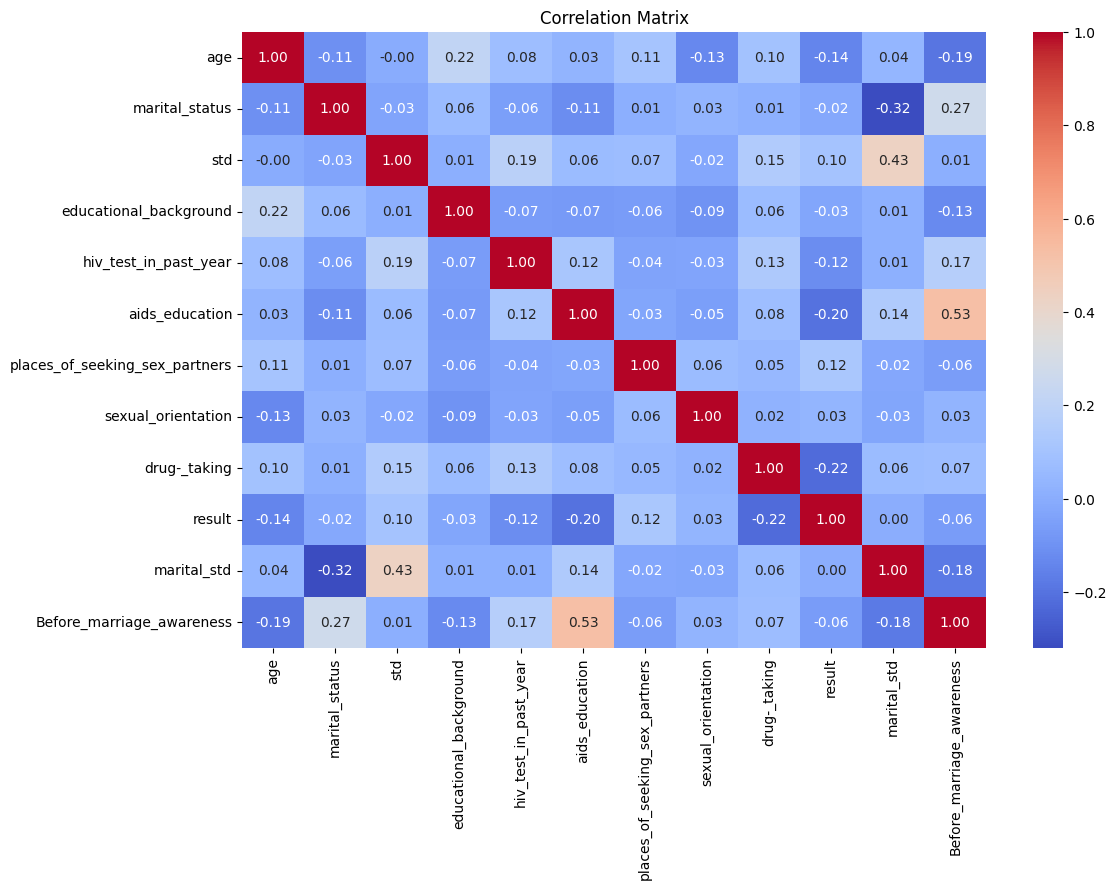

In [161]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [162]:
df.drop(['marital_std'],axis=1,inplace=True)

In [163]:
df.head()

,age,marital_status,std,educational_background,hiv_test_in_past_year,aids_education,places_of_seeking_sex_partners,sexual_orientation,drug-_taking,result,Before_marriage_awareness
0,22,3,0,2,1,0,0,1,1,1,0
1,20,3,0,2,0,1,2,1,0,0,1
2,23,1,1,2,0,1,2,0,0,0,0
3,24,1,0,2,1,1,3,1,1,1,0
4,18,3,1,1,1,0,1,1,1,1,0


# **Logistic Regression**

Accuracy: 0.6197183098591549
Precision: 0.575
Recall: 0.696969696969697
F1 Score: 0.6301369863013698
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.55      0.61        38
           1       0.57      0.70      0.63        33

    accuracy                           0.62        71
   macro avg       0.63      0.62      0.62        71
weighted avg       0.63      0.62      0.62        71



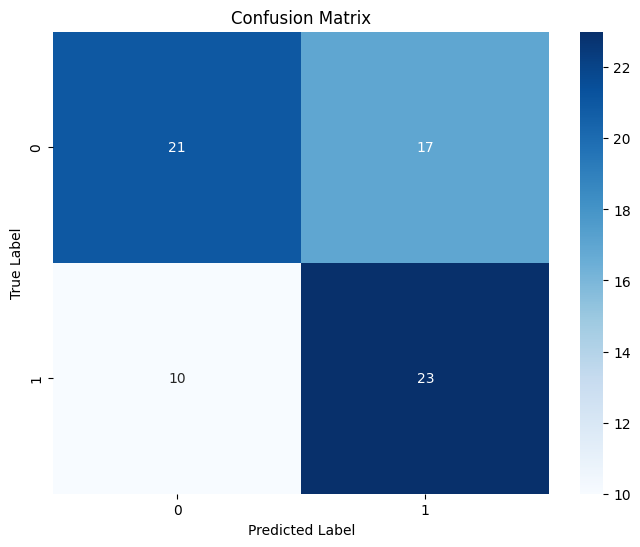

In [164]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Define features and target
X = df.drop(columns=['result'])
y = df['result']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
model_log = LogisticRegression()
model_log.fit(X_train, y_train)

# Make predictions
y_pred = model_log.predict(X_test)

# Calculate evaluation metrics
accuracy_log = accuracy_score(y_test, y_pred)
precision_log = precision_score(y_test, y_pred)
recall_log = recall_score(y_test, y_pred)
f1_score_log = f1_score(y_test, y_pred)
classification_report_log = classification_report(y_test, y_pred)
conf_matrix_log = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy_log}")
print(f"Precision: {precision_log}")
print(f"Recall: {recall_log}")
print(f"F1 Score: {f1_score_log}")
print("Classification Report:")
print(classification_report_log)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_log, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# **XGBoost**

Accuracy: 0.7605633802816901
Precision: 0.7666666666666667
Recall: 0.696969696969697
F1 Score: 0.7301587301587302
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.82      0.78        38
           1       0.77      0.70      0.73        33

    accuracy                           0.76        71
   macro avg       0.76      0.76      0.76        71
weighted avg       0.76      0.76      0.76        71



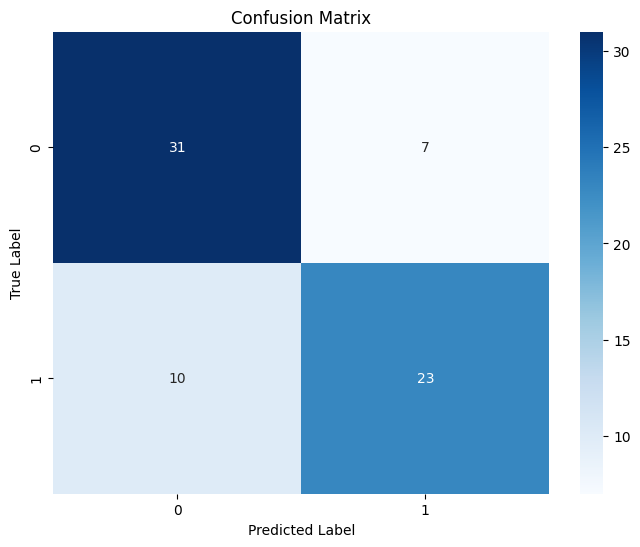

In [171]:
import xgboost as xgb

# Train the XGBoost model
model_xgb = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model_xgb.fit(X_train, y_train)

# Make predictions
y_pred_xgb = model_xgb.predict(X_test)

# Calculate evaluation metrics
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_score_xgb = f1_score(y_test, y_pred_xgb)
classification_report_xgb = classification_report(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# Print the evaluation metrics
print(f"Accuracy: {accuracy_xgb}")
print(f"Precision: {precision_xgb}")
print(f"Recall: {recall_xgb}")
print(f"F1 Score: {f1_score_xgb}")
print("Classification Report:")
print(classification_report_xgb)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# **Random Forest**

Accuracy: 0.704225352112676
Precision: 0.6764705882352942
Recall: 0.696969696969697
F1 Score: 0.6865671641791046
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.71      0.72        38
           1       0.68      0.70      0.69        33

    accuracy                           0.70        71
   macro avg       0.70      0.70      0.70        71
weighted avg       0.70      0.70      0.70        71



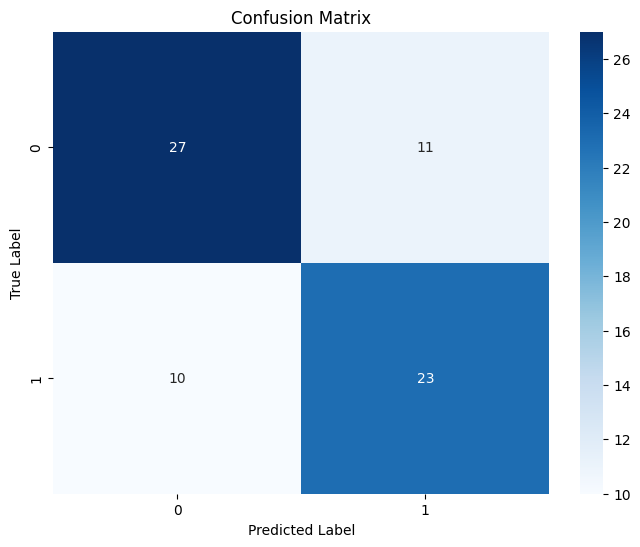

In [167]:
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest model
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = model_rf.predict(X_test)

# Calculate evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_score_rf = f1_score(y_test, y_pred_rf)
classification_report_rf = classification_report(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Print the evaluation metrics
print(f"Accuracy: {accuracy_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1 Score: {f1_score_rf}")
print("Classification Report:")
print(classification_report_rf)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# **Gradient Boosting Machine (GBM)**

Accuracy: 0.7323943661971831
Precision: 0.71875
Recall: 0.696969696969697
F1 Score: 0.7076923076923077
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.76      0.75        38
           1       0.72      0.70      0.71        33

    accuracy                           0.73        71
   macro avg       0.73      0.73      0.73        71
weighted avg       0.73      0.73      0.73        71



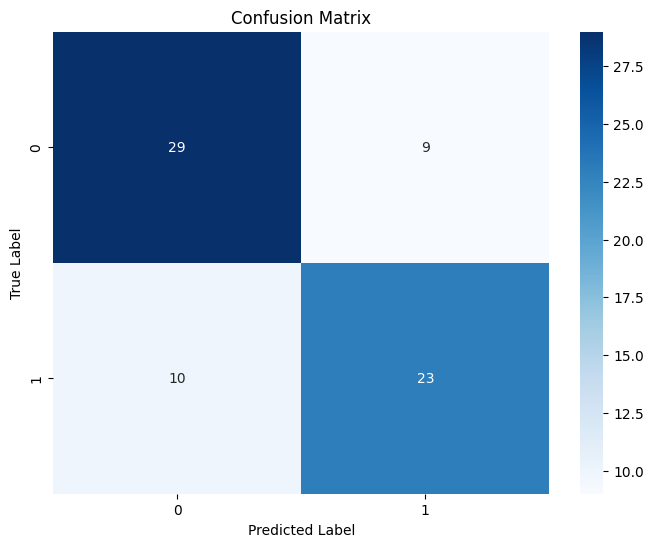

In [169]:
from sklearn.ensemble import GradientBoostingClassifier

# Train the GBM model
model_gbm = GradientBoostingClassifier()
model_gbm.fit(X_train, y_train)

# Make predictions
y_pred_gbm = model_gbm.predict(X_test)

# Calculate evaluation metrics
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
precision_gbm = precision_score(y_test, y_pred_gbm)
recall_gbm = recall_score(y_test, y_pred_gbm)
f1_score_gbm = f1_score(y_test, y_pred_gbm)
classification_report_gbm = classification_report(y_test, y_pred_gbm)
conf_matrix_gbm = confusion_matrix(y_test, y_pred_gbm)

# Print the evaluation metrics
print(f"Accuracy: {accuracy_gbm}")
print(f"Precision: {precision_gbm}")
print(f"Recall: {recall_gbm}")
print(f"F1 Score: {f1_score_gbm}")
print("Classification Report:")
print(classification_report_gbm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gbm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [173]:
X.columns

Index(['age', 'marital_status', 'std', 'educational_background',
       'hiv_test_in_past_year', 'aids_education',
       'places_of_seeking_sex_partners', 'sexual_orientation', 'drug-_taking',
       'Before_marriage_awareness'],
      dtype='object')

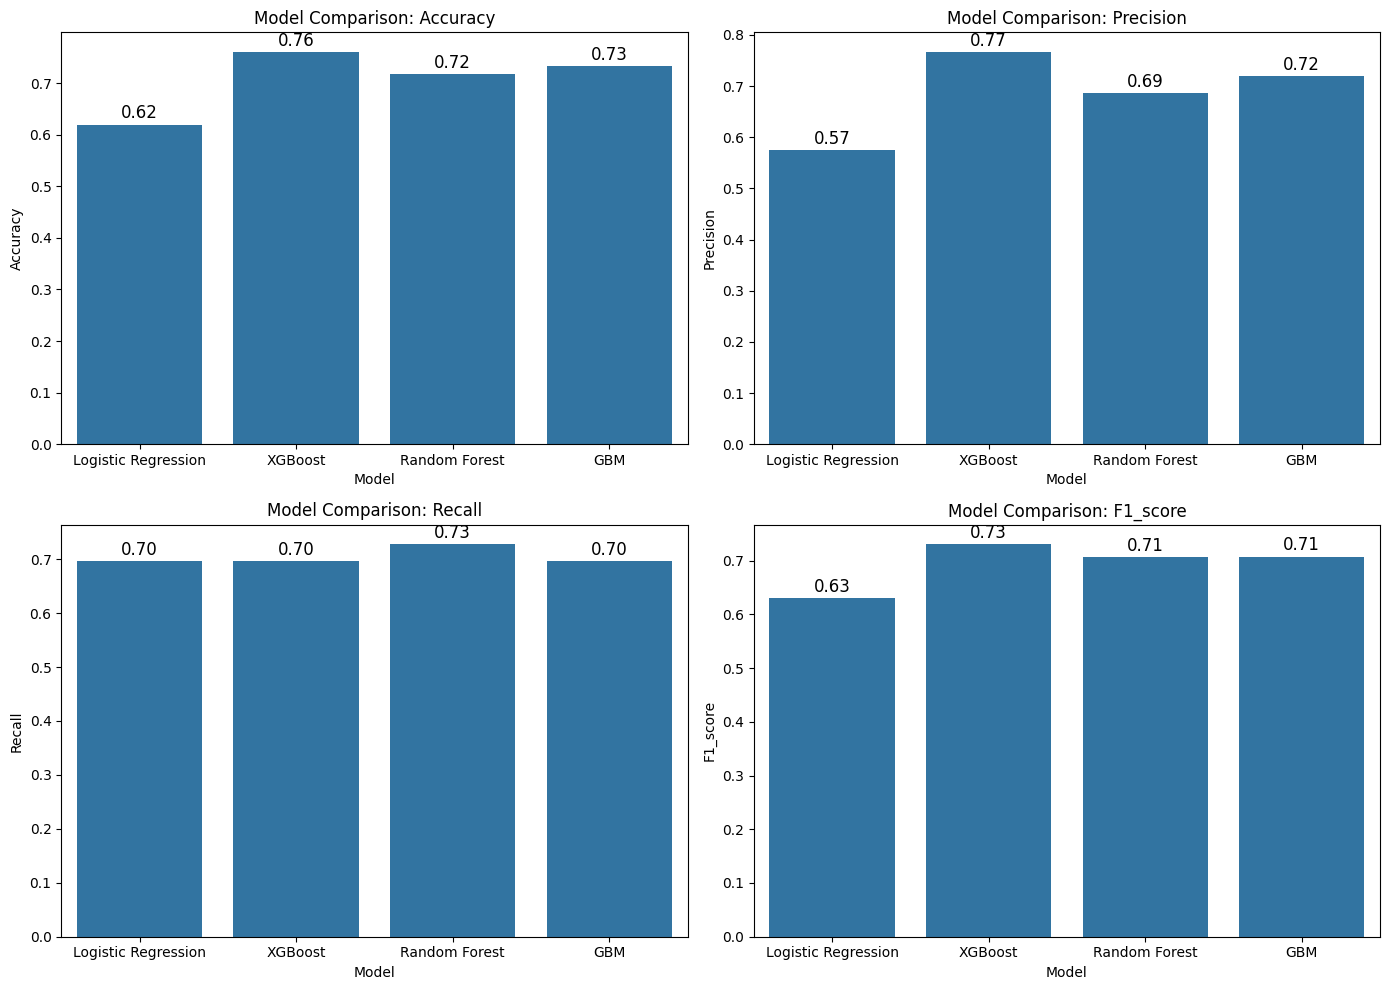

In [170]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'Random Forest': RandomForestClassifier(),
    'GBM': GradientBoostingClassifier()
}

# Dictionary to store the results
results = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1_score': f1_score(y_test, y_pred)
    }

# Convert results to DataFrame for easy plotting
results_df = pd.DataFrame(results).T

# Plot the results
metrics = ['accuracy', 'precision', 'recall', 'f1_score']
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for i, metric in enumerate(metrics):
    sns.barplot(x=results_df.index, y=results_df[metric], ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Model Comparison: {metric.capitalize()}')
    axes[i//2, i%2].set_ylabel(metric.capitalize())
    axes[i//2, i%2].set_xlabel('Model')
    for bar in axes[i//2, i%2].patches:
        axes[i//2, i%2].annotate(format(bar.get_height(), '.2f'),
                                 (bar.get_x() + bar.get_width() / 2,
                                  bar.get_height()), ha='center', va='center',
                                 size=12, xytext=(0, 8),
                                 textcoords='offset points')

plt.tight_layout()
plt.show()


In [172]:
import joblib
joblib.dump(model_xgb,'xgboost_HIV_model.pkl')

['xgboost_HIV_model.pkl']

In [175]:
import joblib
import xgboost as xgb
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the trained model
model = joblib.load('xgboost_HIV_model.pkl')

# Define unique values for each column for reference
unique_values = {
    'marital_status': ['Unmarried', 'Married', 'Widowed', 'Divorced', 'Others'],
    'std': ['No', 'Yes'],
    'educational_background': ['Graduate', '12th pass', '10th pass', 'Illiterate', 'Others'],
    'hiv_test_in_past_year': ['Yes', 'No'],
    'aids_education': ['No', 'Yes'],
    'places_of_seeking_sex_partners': ['Bar', 'Others', 'Park', 'Internet', 'Public bath'],
    'sexual_orientation': ['Heterosexual', 'Bisexual', 'Homosexual'],
    'drug-_taking': ['Yes', 'No'],
    'Before_marriage_awareness': ['No', 'Yes']
}

# Initialize label encoders
label_encoders = {}
for column in unique_values:
    le = LabelEncoder()
    le.fit(unique_values[column])
    label_encoders[column] = le

# Function to get user input
def get_user_input():
    data = {}
    data['age'] = int(input('Enter age (12-80): '))
    data['marital_status'] = input(f"Enter marital status {unique_values['marital_status']}: ")
    data['std'] = input(f"Enter STD status {unique_values['std']}: ")
    data['educational_background'] = input(f"Enter educational background {unique_values['educational_background']}: ")
    data['hiv_test_in_past_year'] = input(f"Had HIV test in past year? {unique_values['hiv_test_in_past_year']}: ")
    data['aids_education'] = input(f"Had AIDS education? {unique_values['aids_education']}: ")
    data['places_of_seeking_sex_partners'] = input(f"Places of seeking sex partners {unique_values['places_of_seeking_sex_partners']}: ")
    data['sexual_orientation'] = input(f"Enter sexual orientation {unique_values['sexual_orientation']}: ")
    data['drug-_taking'] = input(f"Taking drugs? {unique_values['drug-_taking']}: ")
    data['Before_marriage_awareness'] = input(f"Aware before marriage? {unique_values['Before_marriage_awareness']}: ")

    return data

# Function to preprocess user input
def preprocess_input(data):
    df = pd.DataFrame([data])
    for column in label_encoders:
        df[column] = label_encoders[column].transform(df[column])
    return df

# Get user input
user_input = get_user_input()

# Preprocess the input
input_data = preprocess_input(user_input)

# Make prediction
prediction = model.predict(input_data)

# Output the prediction
result = 'HIV Positive' if prediction[0] == 1 else 'HIV Negative'
print(f"The prediction is: {result}")


Enter age (12-80): 21
Enter marital status ['Unmarried', 'Married', 'Widowed', 'Divorced', 'Others']: Unmarried
Enter STD status ['No', 'Yes']: No
Enter educational background ['Graduate', '12th pass', '10th pass', 'Illiterate', 'Others']: 12th pass
Had HIV test in past year? ['Yes', 'No']: No
Had AIDS education? ['No', 'Yes']: Yes
Places of seeking sex partners ['Bar', 'Others', 'Park', 'Internet', 'Public bath']: Others
Enter sexual orientation ['Heterosexual', 'Bisexual', 'Homosexual']: Heterosexual
Taking drugs? ['Yes', 'No']: No
Aware before marriage? ['No', 'Yes']: Yes
The prediction is: HIV Negative
